<a href="https://colab.research.google.com/github/manojcodes93/Netflix-Customer-Churn-EDA/blob/main/Netflix_Churn_Data_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all the essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/netflix_customer_churn.csv")
data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
data.shape # Shows the no of columns and rows from the data

(5000, 14)

In [4]:
data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [5]:
data.dtypes

,0
customer_id,object
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [7]:
data.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


In [8]:
data.churned.value_counts()

,count
churned,
1,2515
0,2485


In [9]:
data_copy = data.copy()

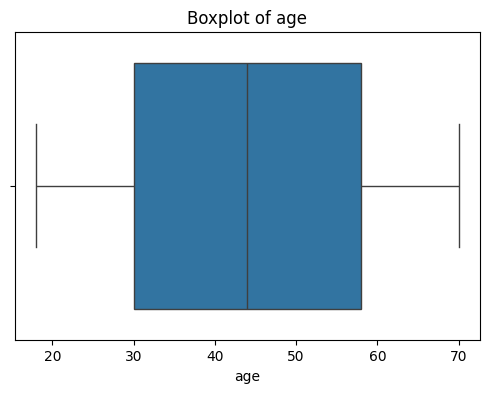

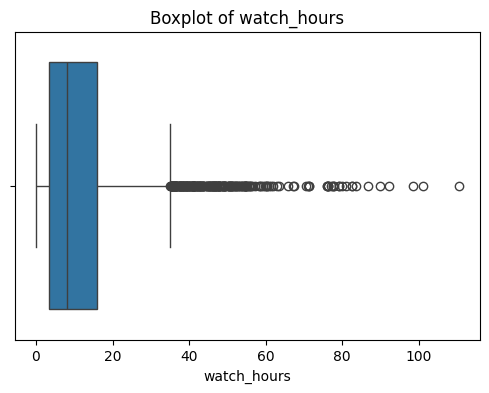

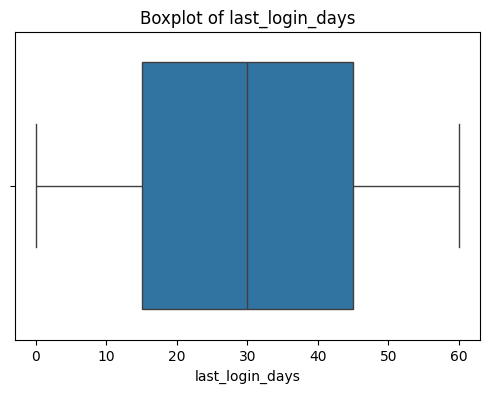

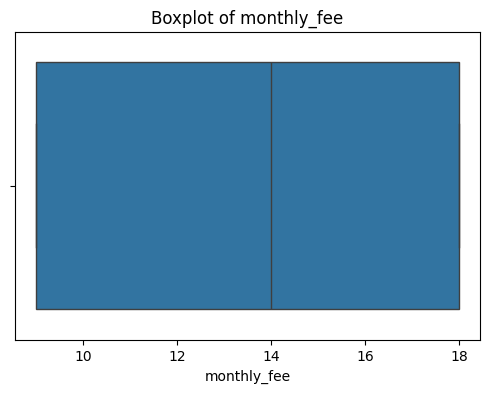

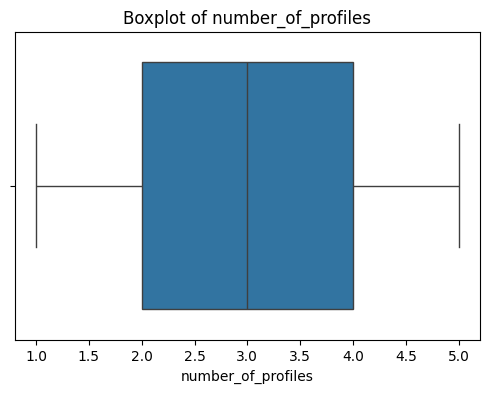

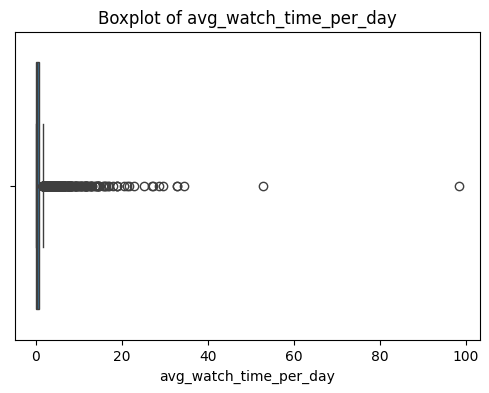

In [10]:
#Numerical Data
num_data = ["age", "watch_hours", "last_login_days", "monthly_fee","number_of_profiles", "avg_watch_time_per_day"]

for i in num_data:
  plt.figure(figsize=(6,4))
  sns.boxplot(x = data_copy[i])
  plt.title(f"Boxplot of {i}")
  plt.show()

##Let's find the outliers in watch_hours

In [11]:
data_copy.watch_hours.max()

110.4

In [12]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = [
    "0-20",
    "20-40",
    "40-60",
    "60-80",
    "80-100",
    "100-120"
]

data_copy["watch_hours_binned"] = pd.cut(data_copy["watch_hours"], bins=bins, labels=labels)

In [13]:
data_copy["watch_hours_binned"].value_counts()

,count
watch_hours_binned,
0-20,4117
20-40,711
40-60,136
60-80,26
80-100,8
100-120,2


## Now let's remove the outliers

In [14]:
filtered_data = data_copy[data_copy["watch_hours"] < 60]

In [15]:
filtered_data.watch_hours.max()

59.99

In [16]:
bins = [0,15,30,45,60]
labels = ["0-15","15-30","30-45","45-60"]

filtered_data["watch_hours_binned"] = pd.cut(filtered_data["watch_hours"], bins = bins, labels = labels)

/tmp/ipython-input-16-159117071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["watch_hours_binned"] = pd.cut(filtered_data["watch_hours"], bins = bins, labels = labels)


In [17]:
filtered_data.watch_hours_binned.value_counts()

,count
watch_hours_binned,
0-15,3646
15-30,989
30-45,238
45-60,91


##Now let's find outliers in watch_hours_per_day

In [18]:
filtered_data.avg_watch_time_per_day.max()

52.8

In [19]:
bins = [0,10,20,30,40,50,60]
labels = ["0-10","10-20","20-30","30-40","40-50","50-60"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

/tmp/ipython-input-19-2766230238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)


In [20]:
filtered_data["avg_watch_time_per_day_binned"].value_counts()

,count
avg_watch_time_per_day_binned,
0-10,4858
10-20,41
20-30,9
30-40,3
50-60,1
40-50,0


## Now let's remove the outliers

In [21]:
filtered_data = filtered_data[filtered_data["avg_watch_time_per_day"] < 10]

In [22]:
filtered_data["avg_watch_time_per_day"].max()

9.81

In [23]:
bins = [0,2.5,5.0,7.5,10.0]
labels = ["0-2.5","2.5-5.0","5.0-7.5","7.5-10.0"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

In [24]:
filtered_data.avg_watch_time_per_day_binned.value_counts()

,count
avg_watch_time_per_day_binned,
0-2.5,4597
2.5-5.0,178
5.0-7.5,58
7.5-10.0,25


##There are still outliers greater than 2.5

##So let's remove values greater than 2

In [25]:
filtered_data = filtered_data[filtered_data["avg_watch_time_per_day"] < 2]

In [26]:
bins = [0,0.5,1.0,1.5,2.0]
labels = ["0-0.5","0.5-1.0","1.0-1.5","1.5-2.0"]

filtered_data["avg_watch_time_per_day_binned"] = pd.cut(filtered_data["avg_watch_time_per_day"], bins = bins, labels = labels)

In [27]:
filtered_data.avg_watch_time_per_day_binned.value_counts()

,count
avg_watch_time_per_day_binned,
0-0.5,3258
0.5-1.0,797
1.0-1.5,293
1.5-2.0,147


In [28]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5


In [29]:
filtered_data.dropna(subset = ["avg_watch_time_per_day_binned"], inplace = True)

In [30]:
filtered_data.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


## Univariate Analysis

In [31]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5


In [33]:
filtered_data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,43.838710,10.266701,32.294327,13.695228,0.547942,3.033593,0.403208
std,15.475881,9.690665,16.444480,3.693727,0.497752,1.413263,0.414675
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.010000
25%,30.000000,3.110000,19.000000,8.990000,0.000000,2.000000,0.100000
50%,44.000000,7.350000,33.000000,13.990000,1.000000,3.000000,0.260000
75%,58.000000,14.325000,46.000000,17.990000,1.000000,4.000000,0.550000
max,70.000000,59.710000,60.000000,17.990000,1.000000,5.000000,1.990000


In [37]:
# Convert all numerical data into categorical data for univariate and bivariate analysis
# Create bins to the age column

bins = [0, 15, 30, 45, 60, 75]
labels = ["0-15", "15-30", "30-45", "45-60", "60-75"]

filtered_data["age_binned"] = pd.cut(filtered_data["age"], bins=bins, labels=labels)

In [36]:
# Create bins to the last_login_days column

bins = [0,12,24,36,48,60]
labels = ["0-12","12-24","24-36","36-48","48-60"]

filtered_data["last_login_days_binned"] = pd.cut(filtered_data["last_login_days"], bins = bins, labels = labels)

In [38]:
# Creating bins to Monthly fee column

bins = [0,4,8,12,16,20]
labels = ["0-4","4-8","8-12","12-16","16-20"]

filtered_data["monthly_fee_binned"] = pd.cut(filtered_data["monthly_fee"], bins = bins, labels = labels)

In [40]:
filtered_data.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hours_binned,avg_watch_time_per_day_binned,age_binned,last_login_days_binned,monthly_fee_binned
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,0-15,0-0.5,45-60,24-36,8-12
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0-15,0-0.5,45-60,12-24,12-16
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,15-30,1.0-1.5,15-30,0-12,12-16
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,0-15,0-0.5,45-60,0-12,16-20
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,0-15,0-0.5,45-60,12-24,12-16


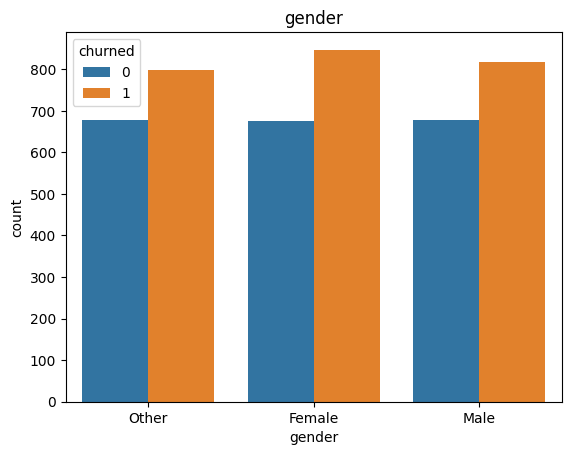

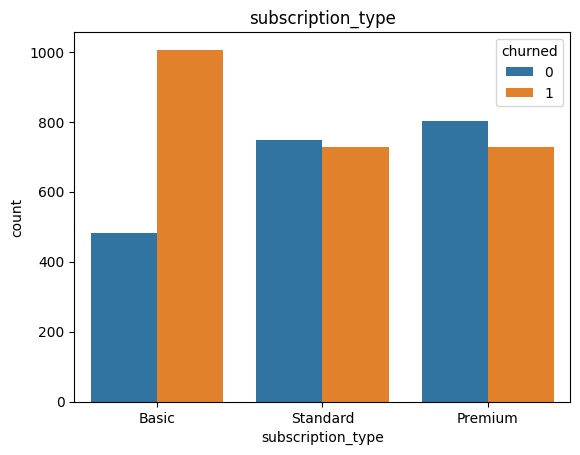

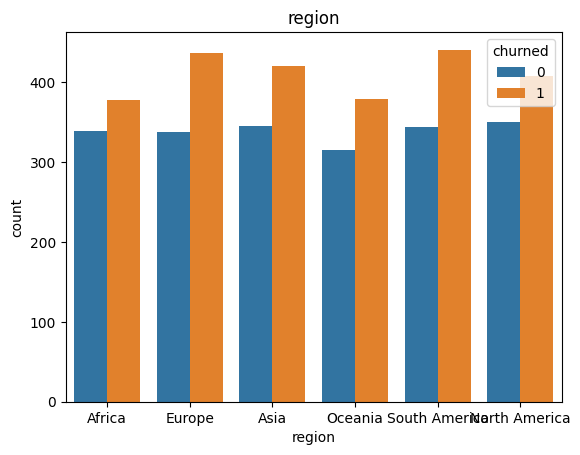

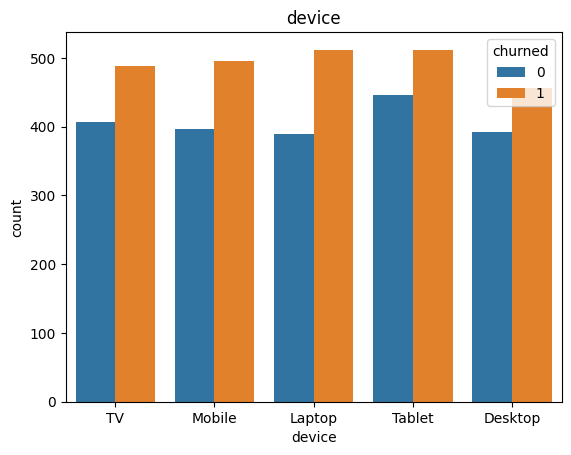

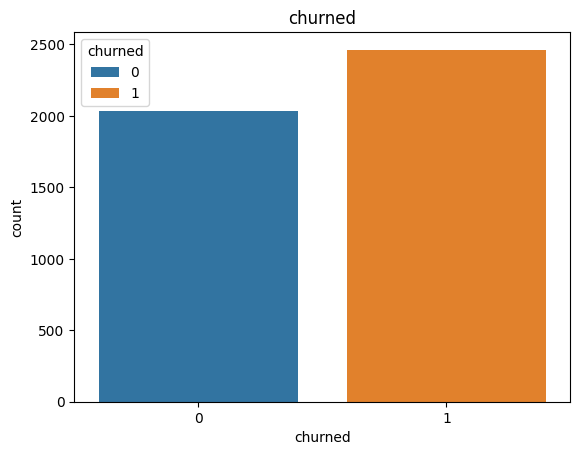

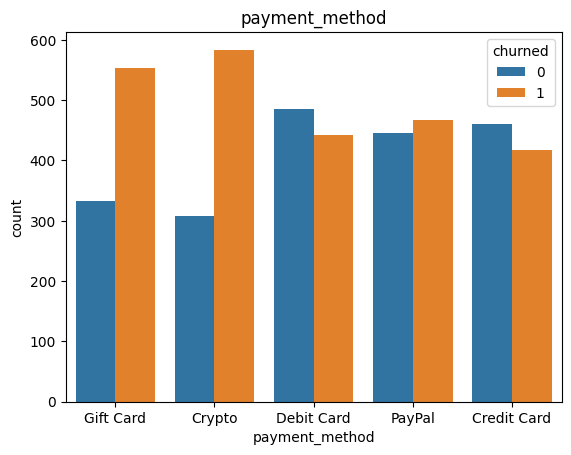

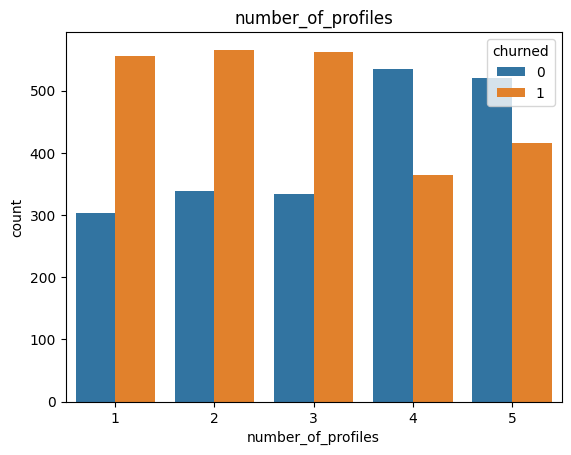

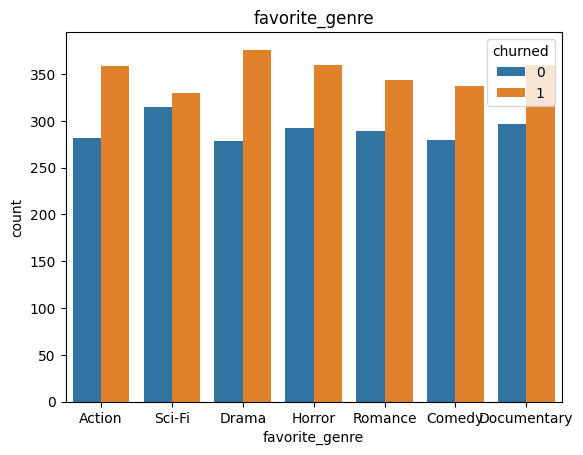

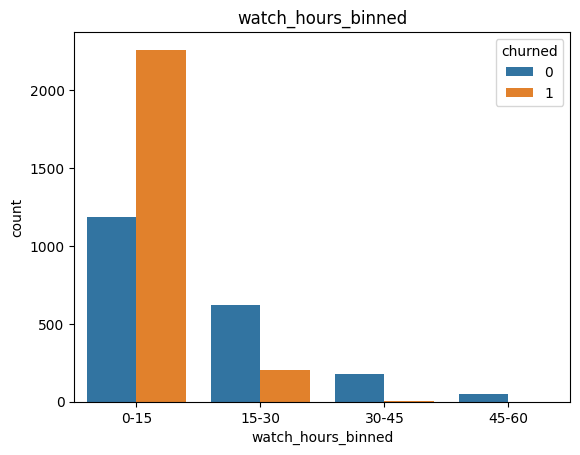

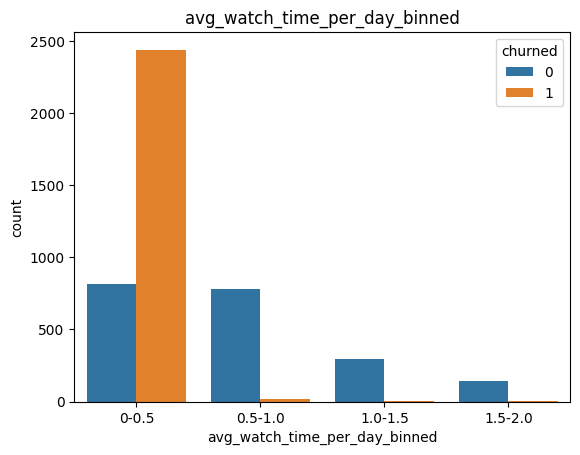

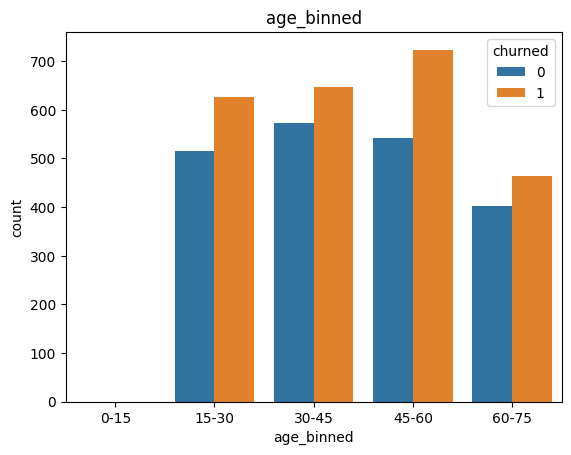

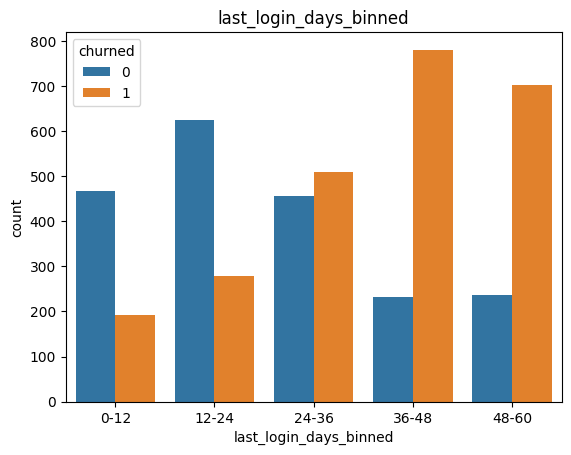

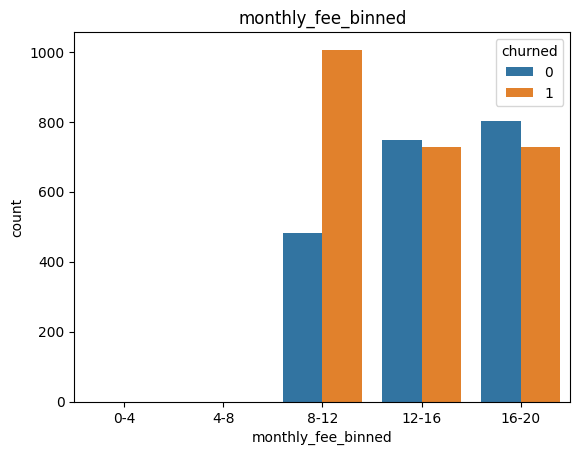

In [44]:
for i, col in enumerate(filtered_data[filtered_data.drop(columns = ["customer_id", "age","watch_hours", "last_login_days", "monthly_fee", "avg_watch_time_per_day"]).columns]):
  plt.figure()
  sns.countplot(data = filtered_data,x = col, hue = "churned")
  plt.title(col)


##Insights

**From Gender**
- The churn rate is high regardless of gender.
- But among the three, Females are more churners.

**From Subscription type**
- The customers on the basic subscription plan are more churners while premium users are most satisfied and retained customers.

**From Region**
- The churn rate is high regardless of the region but North America and Europe have more churn rate.

**From Device**
- Laptop and desktop users are more churners.

**From Payment method**
- It looks like users using stable payment methods like credit/debit card are more loyal whereas crypto and gift card users looks like maybe trail users or less committed.

**From No of profiles**
- Users with less profiles have high churn and vice versa for users with more profiles.
- More profiles = shared accounts = higher engagement --> less churn.

**From Favourite Genre**
- Genre preference might be linked to viewer satisfaction.
- Users whose favorite genre is Drama or Horror tend to churn more often, possibly due to content being consumed quickly or not providing long-term engagement.

**From Watch hours binned**
- Users with 0–15 total watch hours are more likely to churn, while those with higher watch hours are retained more.

**From avg watch time per day**
- Very low average daily watch time strongly correlates with user churn. Users who engage more tend to stay.

**From Age**
- Middle-aged users seem more likely to churn than younger or older groups. However, all age groups show a relatively balanced churn pattern, with churners often slightly outnumbering non-churners.

**From Last Login Days**
- Users who last logged in more than 36 days ago have much higher churn rates. Churn increases significantly with inactivity.

**From Monthly Fee**
- Lower-paying users are more likely to churn, possibly due to affordability concerns. Users paying more might be more engaged or invested.